### Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). 
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


### Importing Required Library

In [1]:
import pandas as pd 
import numpy as np
import pickle
import klib as kl 
import datetime
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None) # to display all columns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


### Features Descriptions

 - label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the             loan{1:success, 0:failure}
 - msisdn: mobile number of user
 - aon: age on cellular network in days
 - daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian                      Rupiah)
 - daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian                      Rupiah)
 - rental30: Average main account balance over last 30 days
 - rental90: Average main account balance over last 90 days
 - last_rech_date_ma: Number of days till last recharge of main account
 - last_rech_date_da: Number of days till last recharge of data account
 - last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)
 - cnt_ma_rech30: Number of times main account got recharged in last 30 days
 - fr_ma_rech30: Frequency of main account recharged in last 30 days
 - sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian                             Rupiah)
 - medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user                          level (in Indonesian Rupiah)
 - medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user                          level (in Indonesian Rupiah)
 - cnt_ma_rech90: Number of times main account got recharged in last 90 days
 - fr_ma_rech90: Frequency of main account recharged in last 90 days
 - sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indonasian                             Rupiah)
 - medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user                          level (in Indonasian Rupiah)
 - medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user                          level (in Indonasian Rupiah)
 - cnt_da_rech30: Number of times data account got recharged in last 30 days
 - fr_da_rech30: Frequency of data account recharged in last 30 days
 - cnt_da_rech90: Number of times data account got recharged in last 90 days
 - fr_da_rech90: Frequency of data account recharged in last 90 days
 - cnt_loans30: Number of loans taken by user in last 30 days
 - amnt_loans30: Total amount of loans taken by user in last 30 days
 - maxamnt_loans30: Maximum amount of loan taken by the user in last 30 days
 - medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
 - cnt_loans90: Number of loans taken by user in last 90 days
 - amnt_loans90: Total amount of loans taken by user in last 90 days
 - maxamnt_loans90: Maximum amount of loan taken by the user in last 90 days
 - medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
 - payback30: Average payback time in days over last 30 days
 - payback90: Average payback time in days over last 90 days
 - pcircle: telecom circle
 - pdate: date


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (209593, 37)


### Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64



#### No missing values found in the dataset.

### Information about dataset

In [5]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15 

#### Categorical data present in our data set

### Drop Unwanted Column

In [3]:
# Delete unwanted column
df = df.drop(columns ='Unnamed: 0')
df.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10


### Statistics of Data

In [7]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### Features Engineering

In [4]:
# convert pdate column into date time formate
df['pdate'] = pd.to_datetime(df['pdate'])

In [5]:
df['pdate'].dtype

dtype('<M8[ns]')

### Add Year and Months column

In [6]:
df['Years'] = df['pdate'].dt.year
df['Months'] = df['pdate'].dt.month
df.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Years,Months
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20,2016,7
1,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10,2016,8


### Encoding Categorical Column

In [7]:
oe = OrdinalEncoder()

In [8]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Years,Months
0,0,40191.0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,0.0,2016-07-20,2016,7
1,1,142291.0,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,0.0,2016-08-10,2016,8


In [9]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  float64       
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13

#### All categorical columns are encoded

### Drop unwanted column

In [10]:
col = ['pdate','msisdn']
df = df.drop(col, axis = 1)
df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Years,Months
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,0.0,2016,7
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,0.0,2016,8


In [11]:
print('No of Rows and Columns After Dropping Columns ----->', df.shape )

No of Rows and Columns After Dropping Columns -----> (209593, 36)


### Data distribution

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


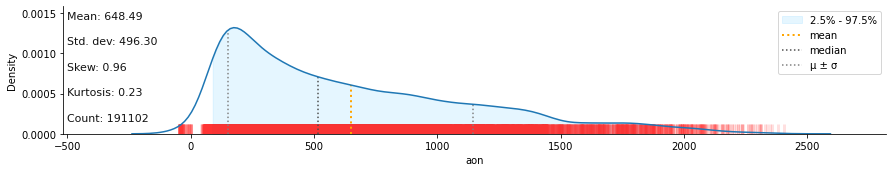

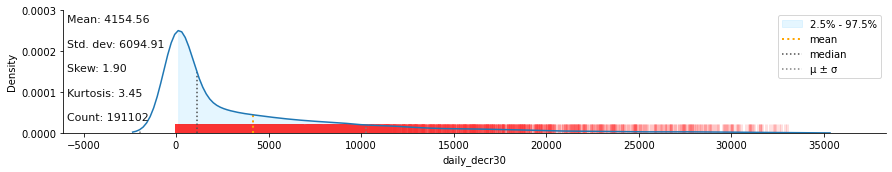

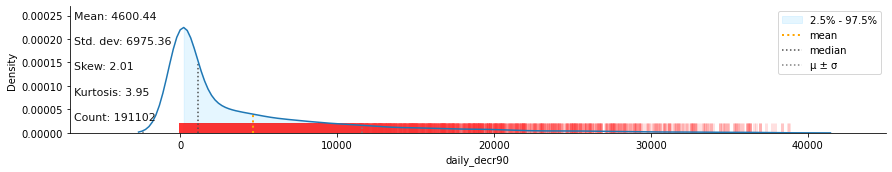

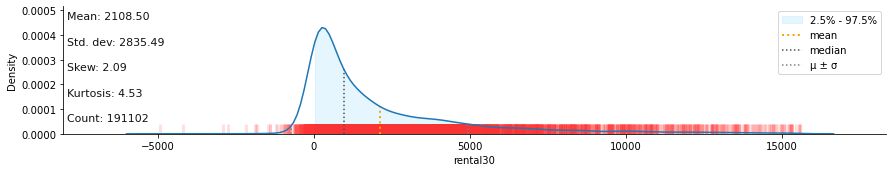

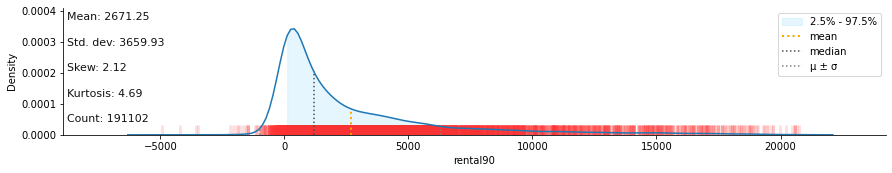

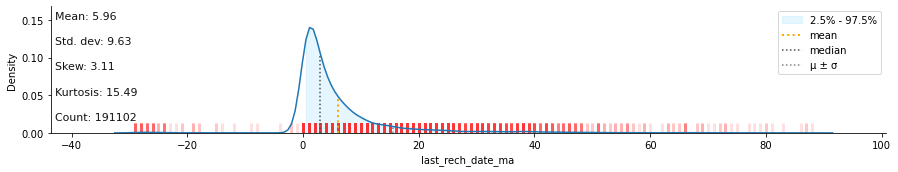

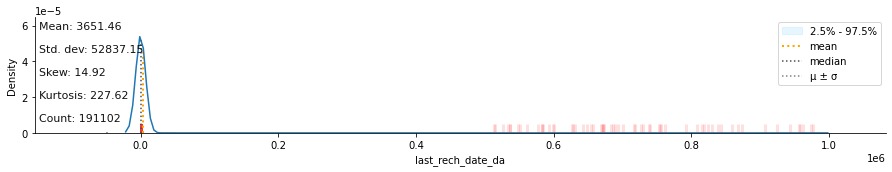

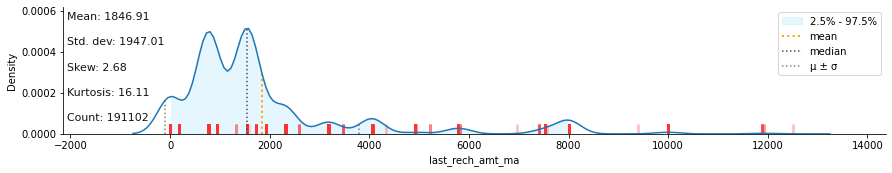

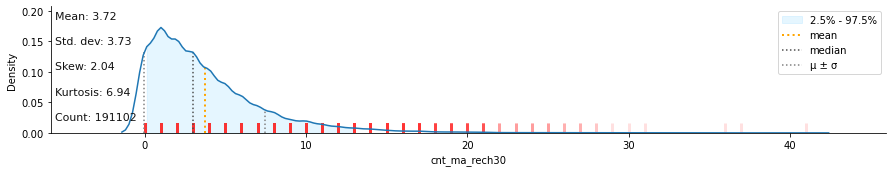

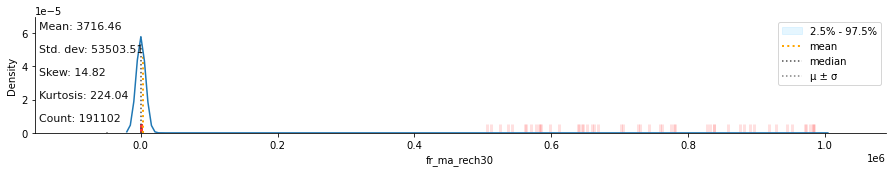

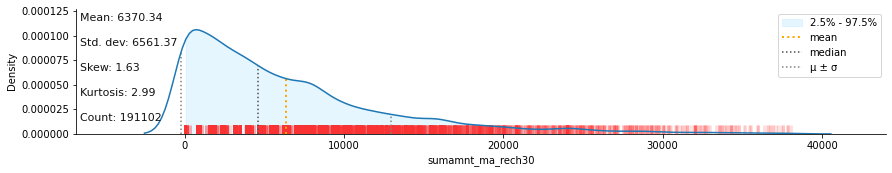

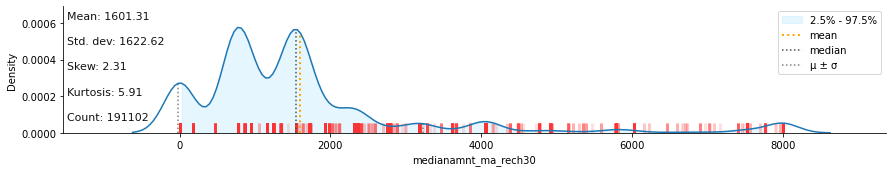

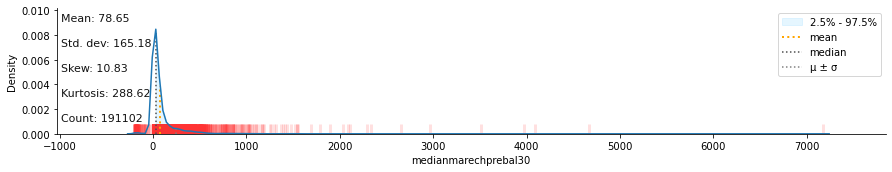

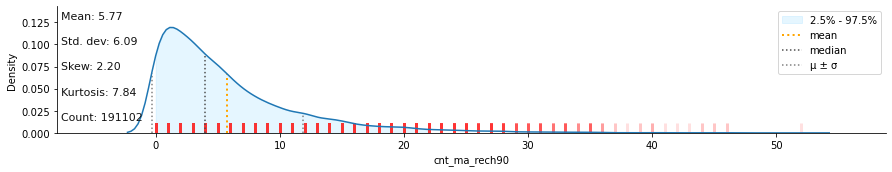

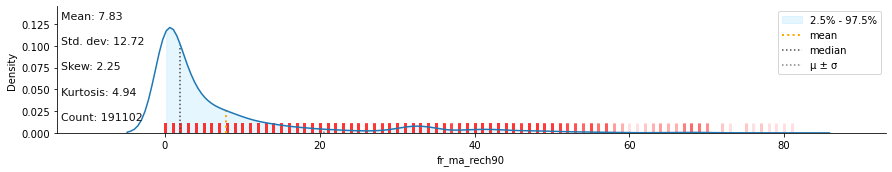

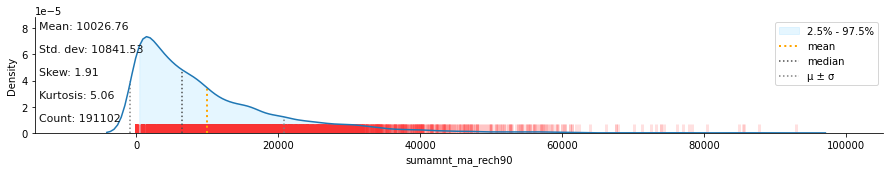

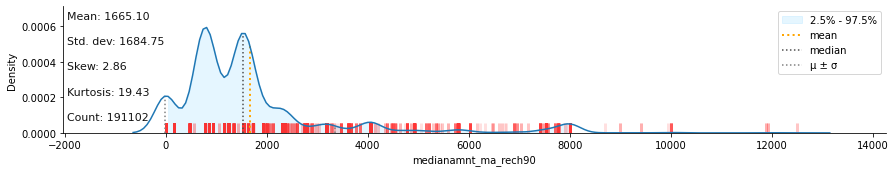

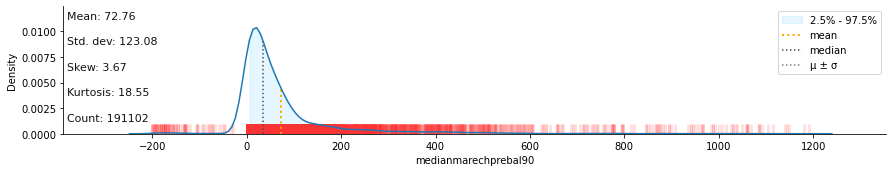

In [60]:
kl.dist_plot(df.iloc[:,0:19])
plt.tight_layout()

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


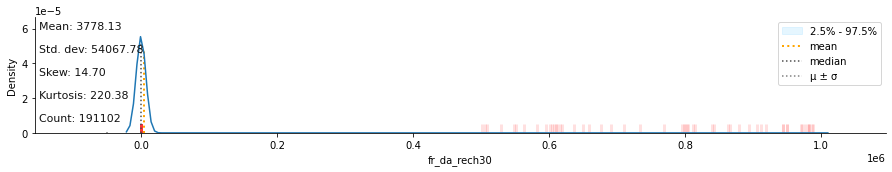

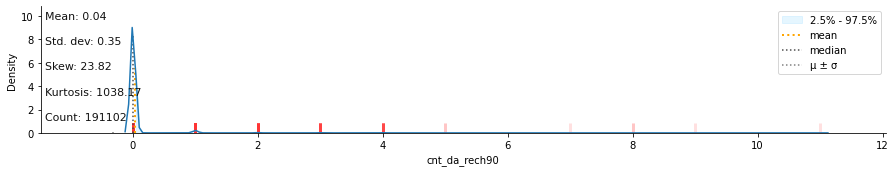

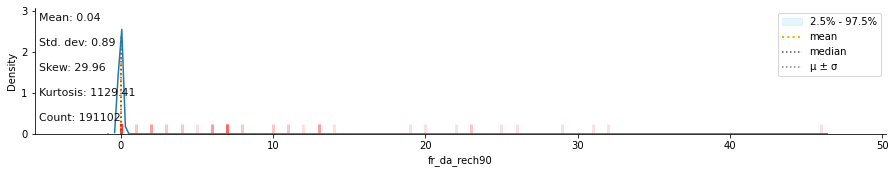

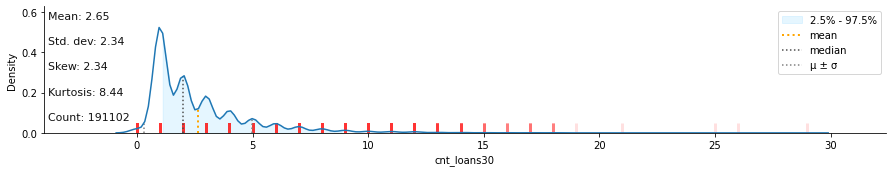

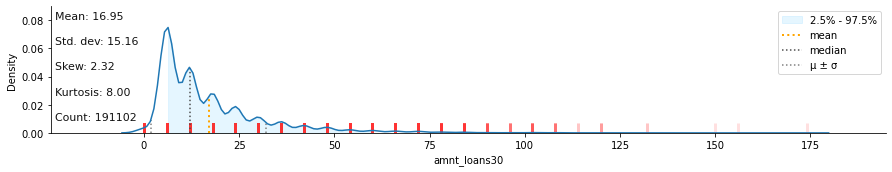

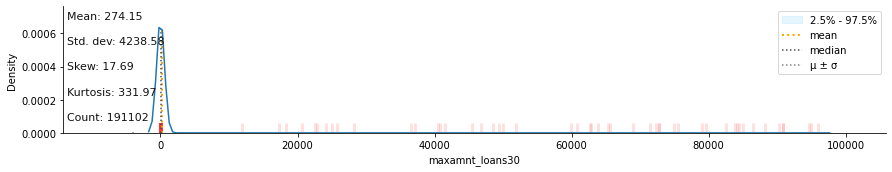

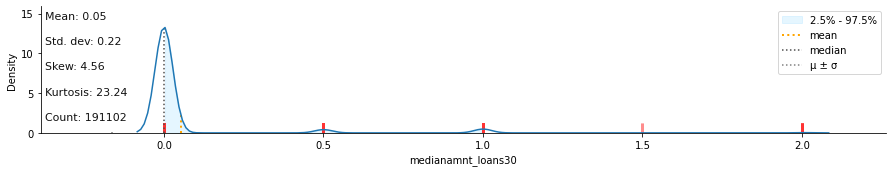

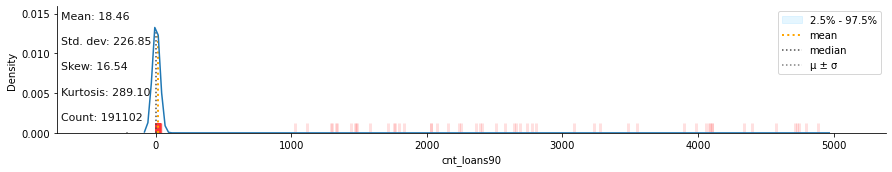

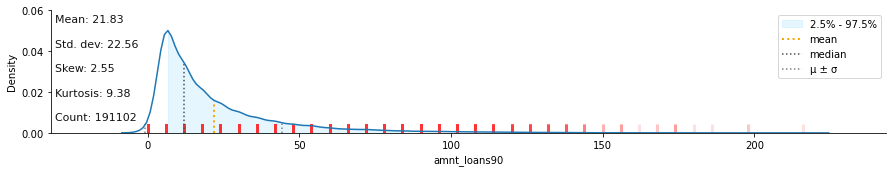

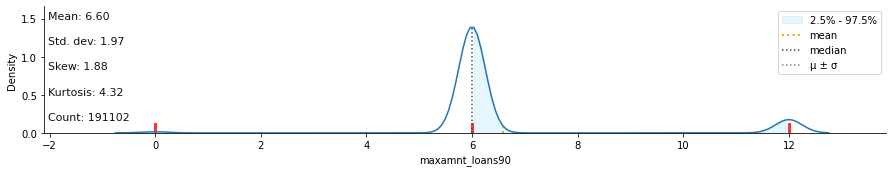

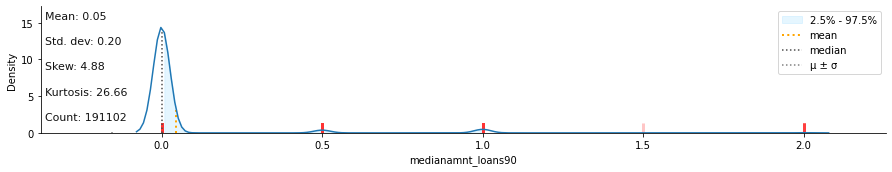

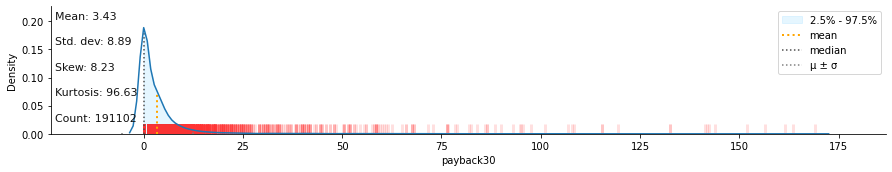

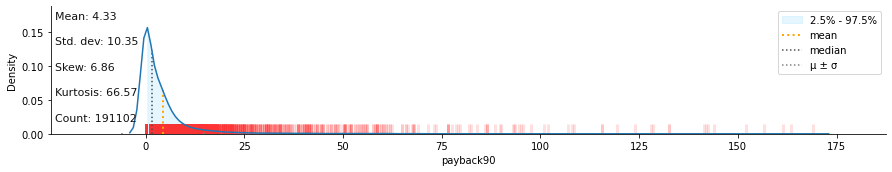

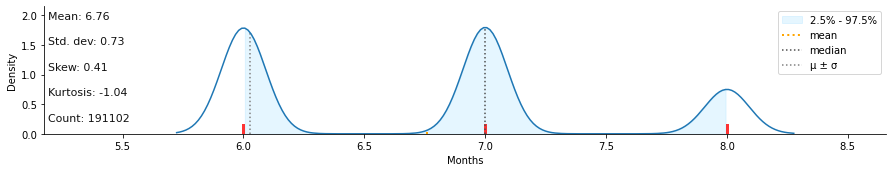

In [55]:
kl.dist_plot(df.iloc[:,20:36])
plt.tight_layout()

---------------------
Distribution Plot :- 
---------------------


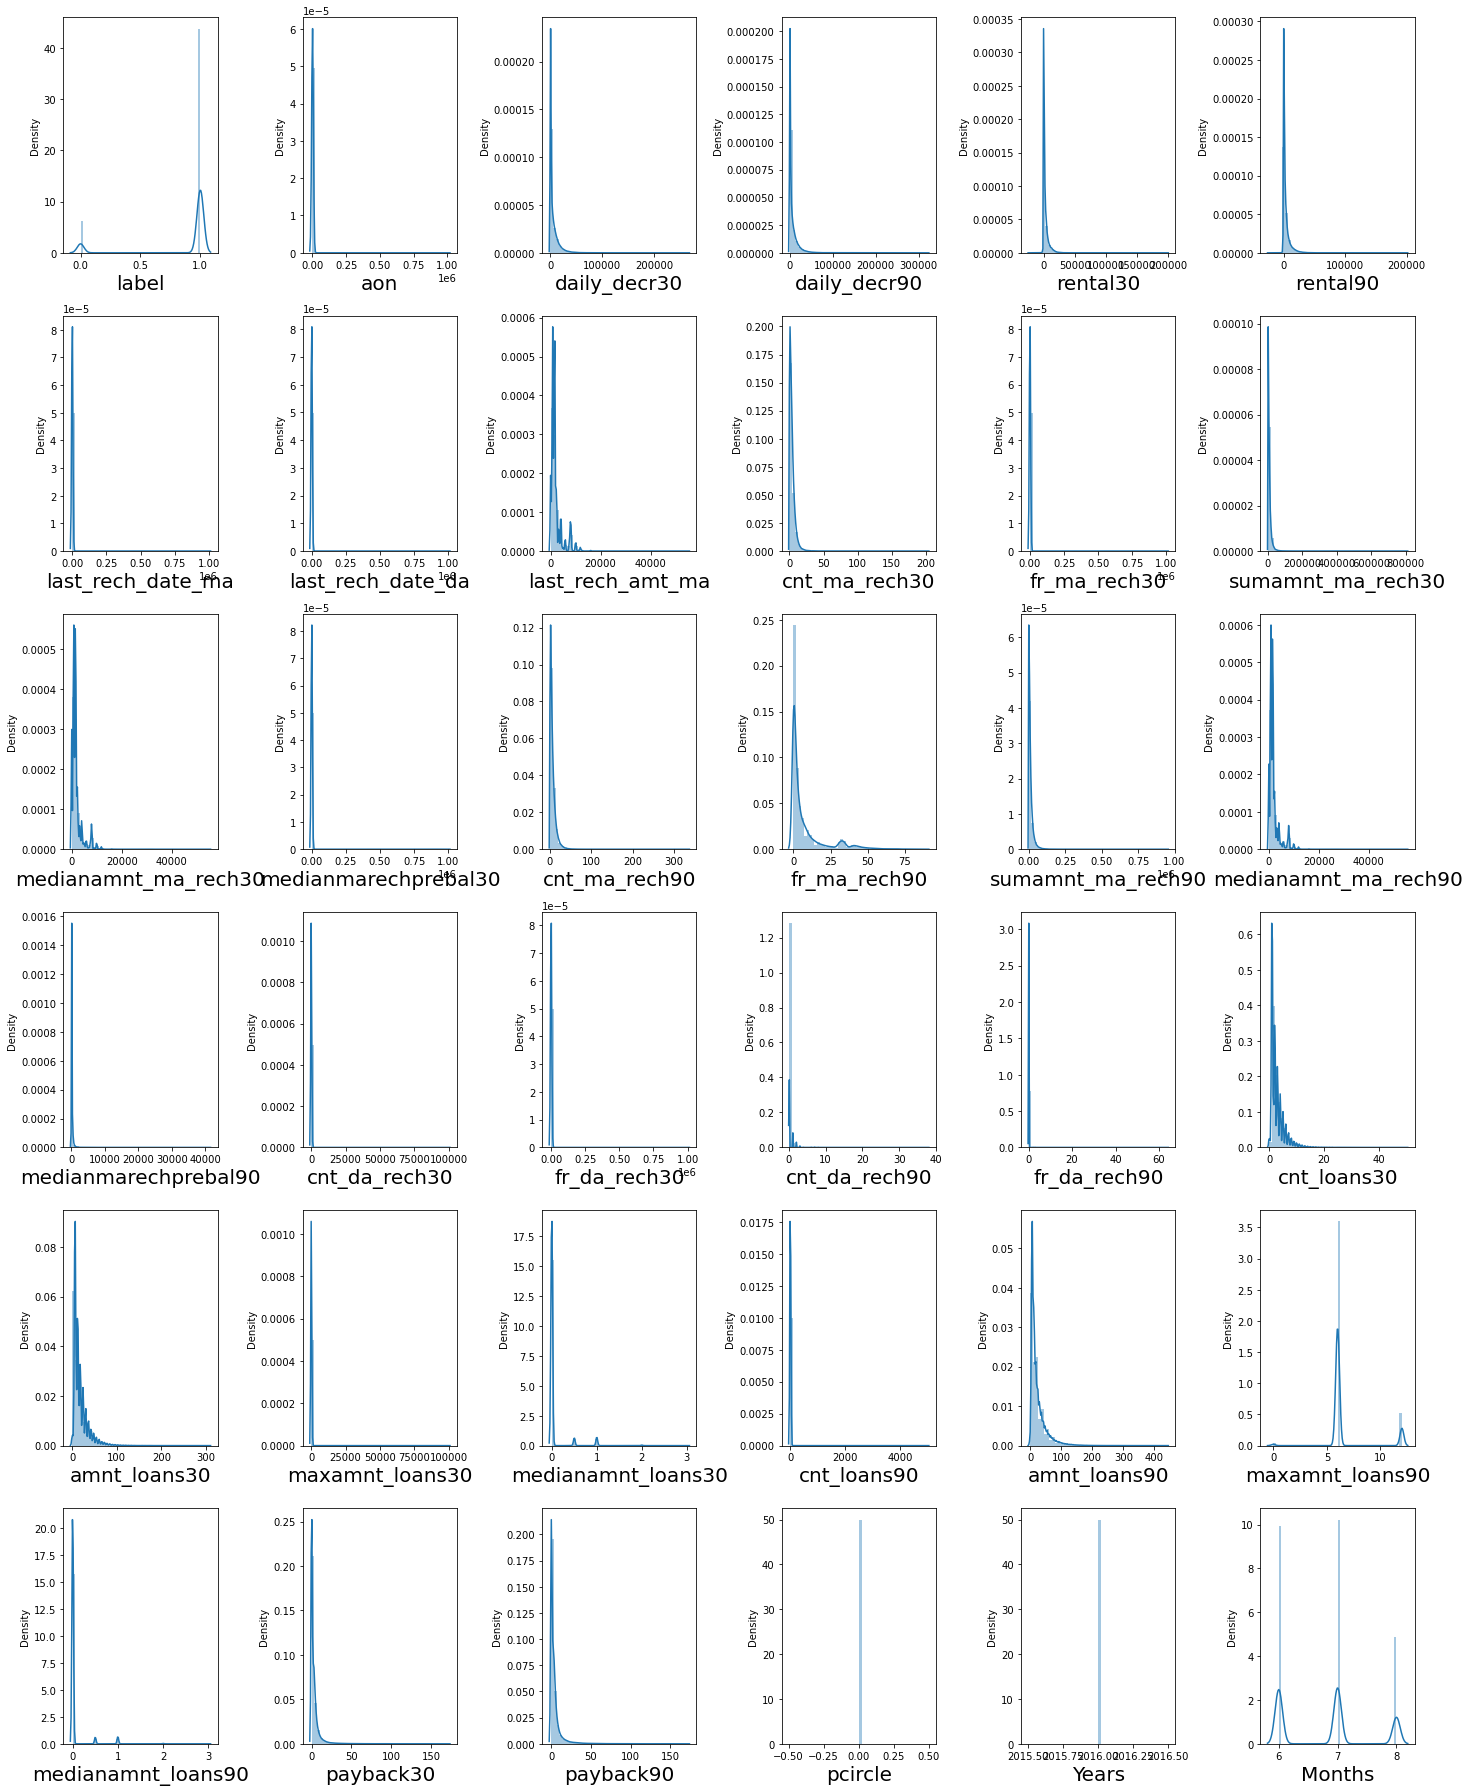

In [17]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=36:
        ax = plt.subplot(6,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### We look into plots and observe data has skewness

### Check skweness

In [23]:
print('=======================================')
print(df.skew())
print('=======================================')

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

#### Skewness present in our dataset

### Corelation of Feature vs Label using Heat map

In [61]:
kl.corr_mat(df) # returns a color-encoded correlation matrix

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Years,Months
label,1.00,0.08,0.19,0.19,0.05,0.07,-0.09,0.00,0.14,0.25,0.00,0.26,0.16,0.11,0.25,0.09,0.25,0.13,0.12,0.00,0.00,0.00,-0.01,0.20,0.21,-0.00,0.05,0.00,0.21,0.07,0.04,0.05,0.05,-,-,0.14
aon,0.08,1.00,0.07,0.07,0.05,0.06,0.02,0.00,0.08,0.01,0.00,0.05,0.09,0.02,0.03,0.03,0.07,0.09,0.02,0.00,-0.00,0.01,0.01,0.04,0.05,-0.00,-0.00,0.01,0.07,0.03,-0.01,0.02,0.04,-,-,0.06
daily_decr30,0.19,0.07,1.00,0.98,0.45,0.50,-0.05,-0.00,0.24,0.42,-0.00,0.54,0.25,0.09,0.59,-0.06,0.71,0.21,0.05,0.00,0.00,0.05,0.02,0.35,0.44,-0.00,-0.01,0.01,0.57,0.40,-0.04,0.05,0.08,-,-,0.60
daily_decr90,0.19,0.07,0.98,1.00,0.44,0.51,-0.05,-0.00,0.23,0.40,-0.00,0.51,0.24,0.09,0.60,-0.06,0.72,0.20,0.05,0.00,-0.00,0.04,0.02,0.33,0.41,-0.00,-0.00,0.01,0.58,0.40,-0.04,0.05,0.08,-,-,0.63
rental30,0.05,0.05,0.45,0.44,1.00,0.95,-0.03,0.00,0.09,0.25,0.00,0.27,0.09,0.03,0.32,-0.02,0.34,0.07,-0.00,-0.00,-0.00,0.08,0.06,0.19,0.24,-0.00,-0.02,0.00,0.30,0.22,-0.04,0.09,0.12,-,-,0.36
rental90,0.07,0.06,0.50,0.51,0.95,1.00,-0.01,-0.00,0.09,0.25,-0.00,0.26,0.09,0.03,0.37,-0.03,0.38,0.07,-0.00,0.00,-0.00,0.07,0.05,0.18,0.24,-0.00,-0.01,0.00,0.34,0.25,-0.04,0.09,0.13,-,-,0.45
last_rech_date_ma,-0.09,0.02,-0.05,-0.05,-0.03,-0.01,1.00,-0.00,0.25,-0.24,-0.00,-0.17,0.03,-0.01,-0.17,-0.01,-0.08,0.24,0.08,-0.00,-0.00,0.01,0.01,-0.20,-0.19,-0.00,0.02,-0.00,-0.16,-0.04,0.02,-0.09,-0.06,-,-,0.06
last_rech_date_da,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,1.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-,-,-0.00
last_rech_amt_ma,0.14,0.08,0.24,0.23,0.09,0.09,0.25,-0.00,1.00,-0.02,-0.00,0.42,0.75,0.15,-0.00,0.13,0.40,0.81,0.19,-0.00,-0.00,0.02,0.01,-0.03,-0.00,0.00,0.03,0.00,0.00,0.13,0.02,-0.01,0.00,-,-,0.08
cnt_ma_rech30,0.25,0.01,0.42,0.40,0.25,0.25,-0.24,0.00,-0.02,1.00,0.00,0.72,-0.02,0.06,0.88,-0.14,0.62,-0.07,0.05,0.00,-0.00,0.01,0.01,0.76,0.75,-0.00,-0.07,0.01,0.68,0.15,-0.07,0.06,0.03,-,-,0.13


-----------
Heat Map :-
-----------


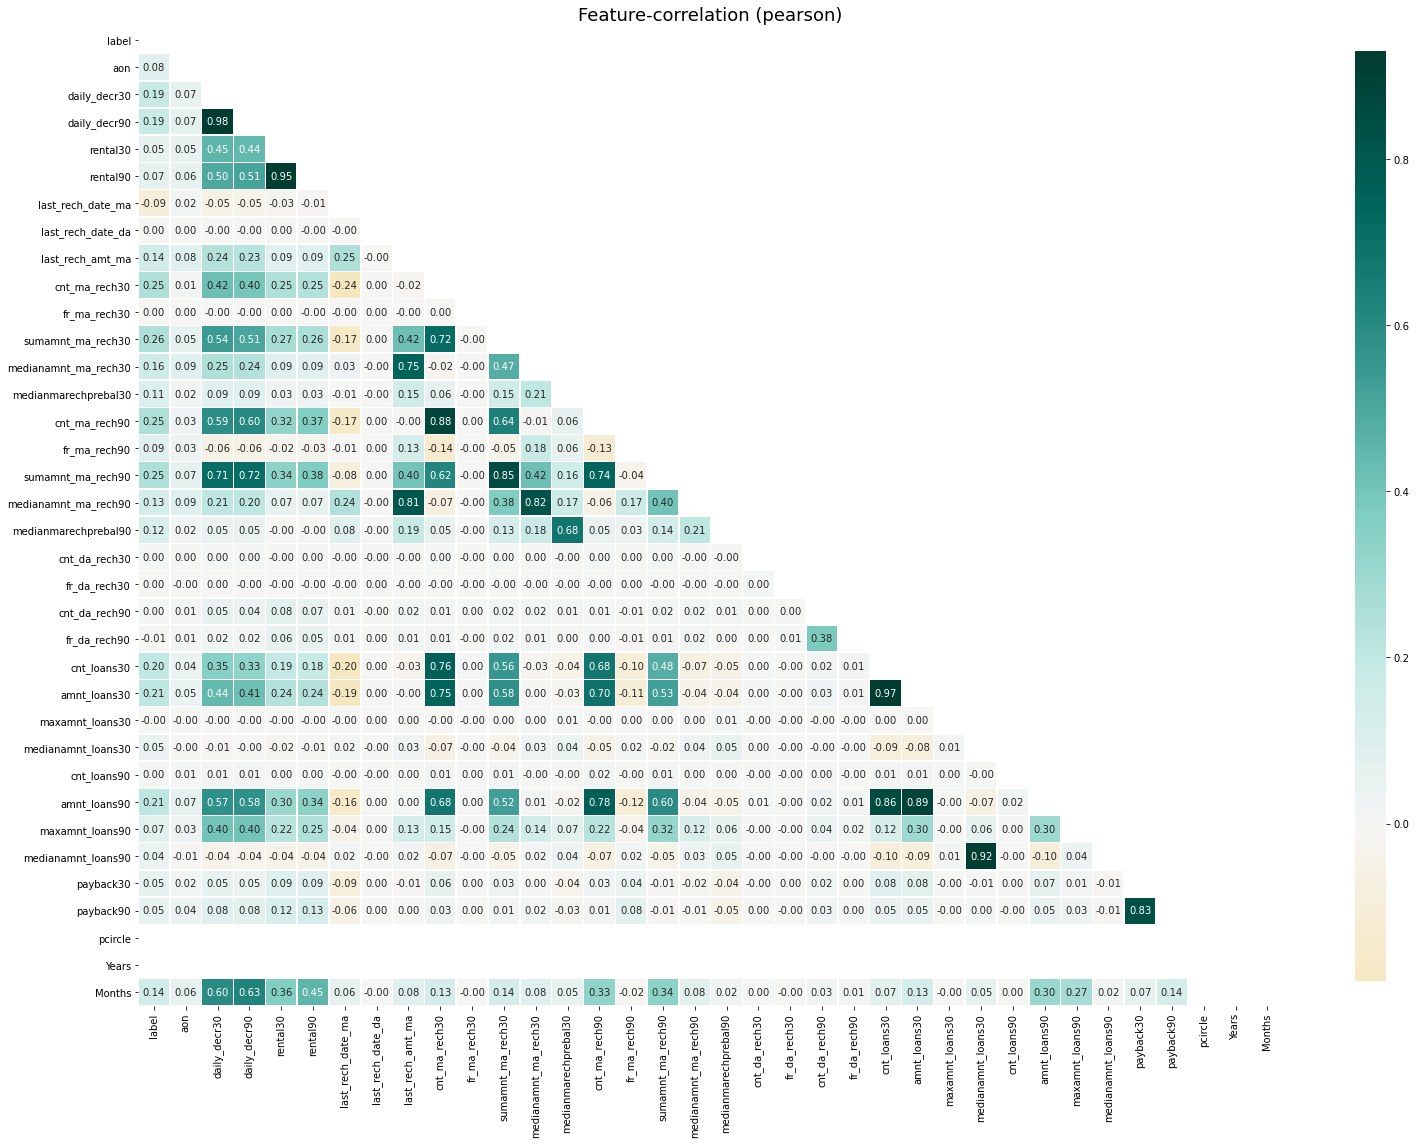

In [62]:
print('-----------')
print('Heat Map :-')
print('-----------')
kl.corr_plot(df, figsize = (22, 16)) # returns a color-encoded heatmap, ideal for correlations
plt.tight_layout()

#### daily_decr90 feature shows highest corelation

### Checking Outliers

Box Plot :-


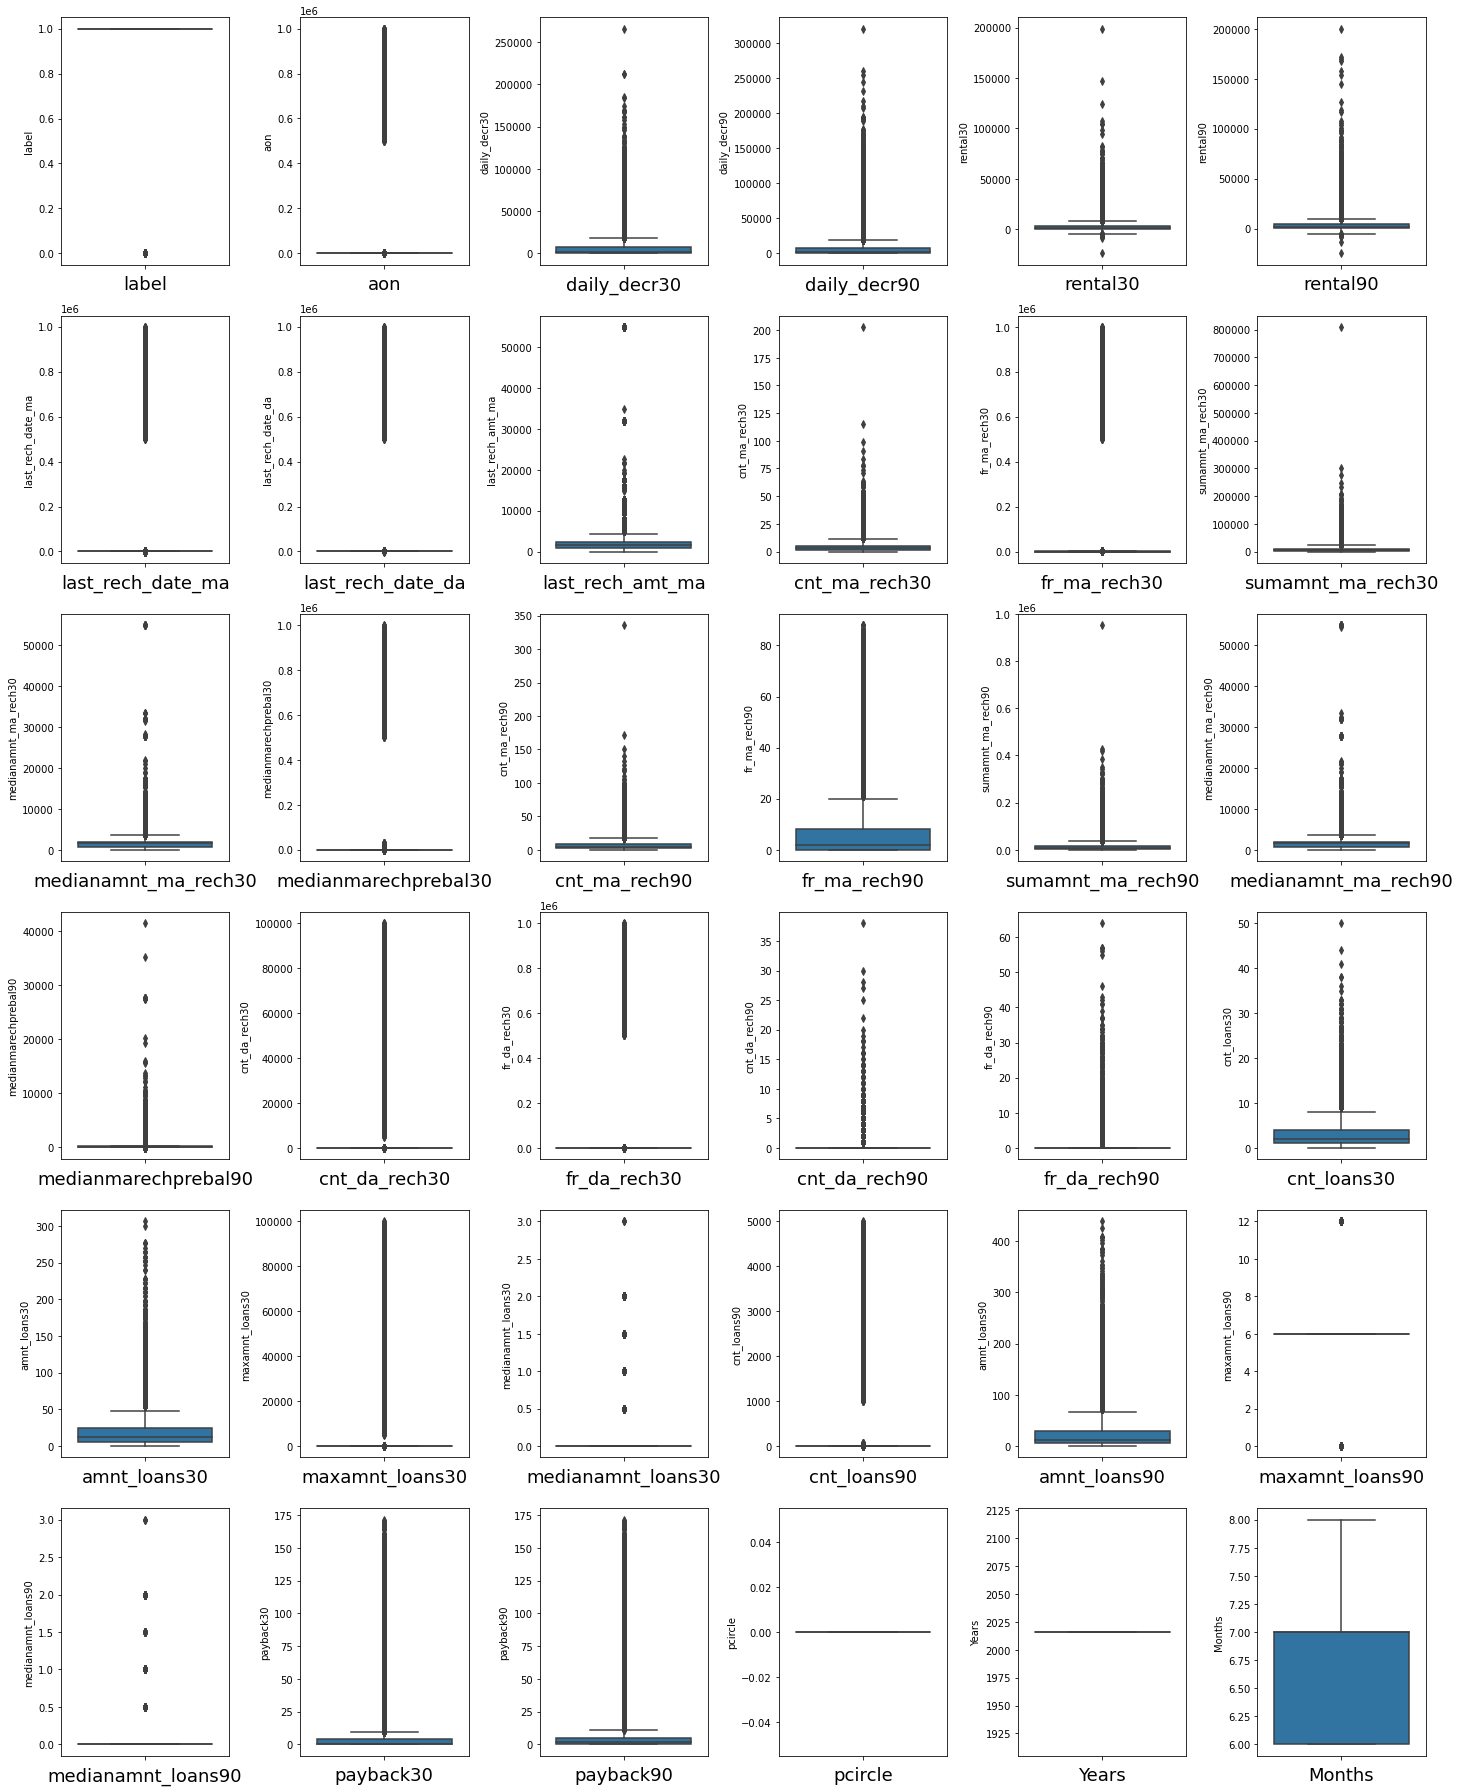

In [42]:
print('===========')
print('Box Plot :-')
print('===========')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=36:
        ax = plt.subplot(6,6, plotnumber)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### There are outliers presents in dataset

### Removing Outliers

In [11]:
# with std 3 Lets see the stats

z_score = zscore(df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','medianmarechprebal90','medianmarechprebal90']]) # use only continous data
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

df = df[filtering_entry]
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Years,Months
count,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.000000,191102.0,191102.0,191102.000000
mean,0.869337,648.486714,4154.560824,4600.442708,2108.503216,2671.253083,5.958467,3651.460355,1846.906935,3.724843,3716.455238,6370.336307,1601.314285,78.650987,5.773550,7.825240,10026.759662,1665.102741,72.756979,266.422605,3778.128521,0.039084,0.041507,2.654117,16.948143,274.152258,0.053785,18.459489,21.830038,6.595944,0.046371,3.429161,4.332775,0.0,2016.0,6.757407
std,0.337033,496.302328,6094.910380,6975.356768,2835.490099,3659.932700,9.625684,52837.146167,1947.011674,3.732852,53503.506591,6561.368656,1622.623944,165.178777,6.086589,12.722837,10841.525083,1684.750878,123.083384,4217.544706,54067.784098,0.353830,0.890228,2.339599,15.161612,4238.576807,0.217357,226.853120,22.559585,1.967058,0.201106,8.889139,10.349011,0.0,0.0,0.728607
min,0.000000,-48.000000,-46.215000,-46.215000,-7786.750000,-7786.750000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2016.0,6.000000
25%,1.000000,241.000000,37.373083,37.600000,252.482500,281.977500,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,10.000000,2.000000,0.000000,2309.000000,771.500000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,2016.0,6.000000
50%,1.000000,514.000000,1124.730167,1150.000000,966.290000,1183.895000,3.000000,0.000000,1539.000000,3.000000,2.000000,4617.000000,1539.000000,32.000000,4.000000,2.000000,6515.000000,1539.000000,34.500000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.585784,0.0,2016.0,7.000000
75%,1.000000,952.000000,6175.828000,6578.487500,2819.220000,3589.500000,7.000000,0.000000,1924.000000,5.000000,6.000000,9234.000000,1547.000000,78.000000,8.000000,9.000000,14176.750000,1547.000000,76.000000,0.000000,0.000000,0.000000,0.000000,3.000000,24.000000,6.000000,0.000000,4.000000,30.000000,6.000000,0.000000,3.833333,4.538462,0.0,2016.0,7.000000
max,1.000000,2440.000000,33032.000000,38832.600000,15617.510000,20794.550000,113.000000,999171.809410,55000.000000,46.000000,999606.368132,38111.000000,8000.000000,8472.750000,84.000000,88.000000,142716.000000,55000.000000,1199.000000,99842.336335,999809.240107,30.000000,64.000000,31.000000,186.000000,99864.560864,3.000000,4997.517944,318.000000,12.000000,3.000000,171.500000,171.500000,0.0,2016.0,8.000000


Box Plot :-


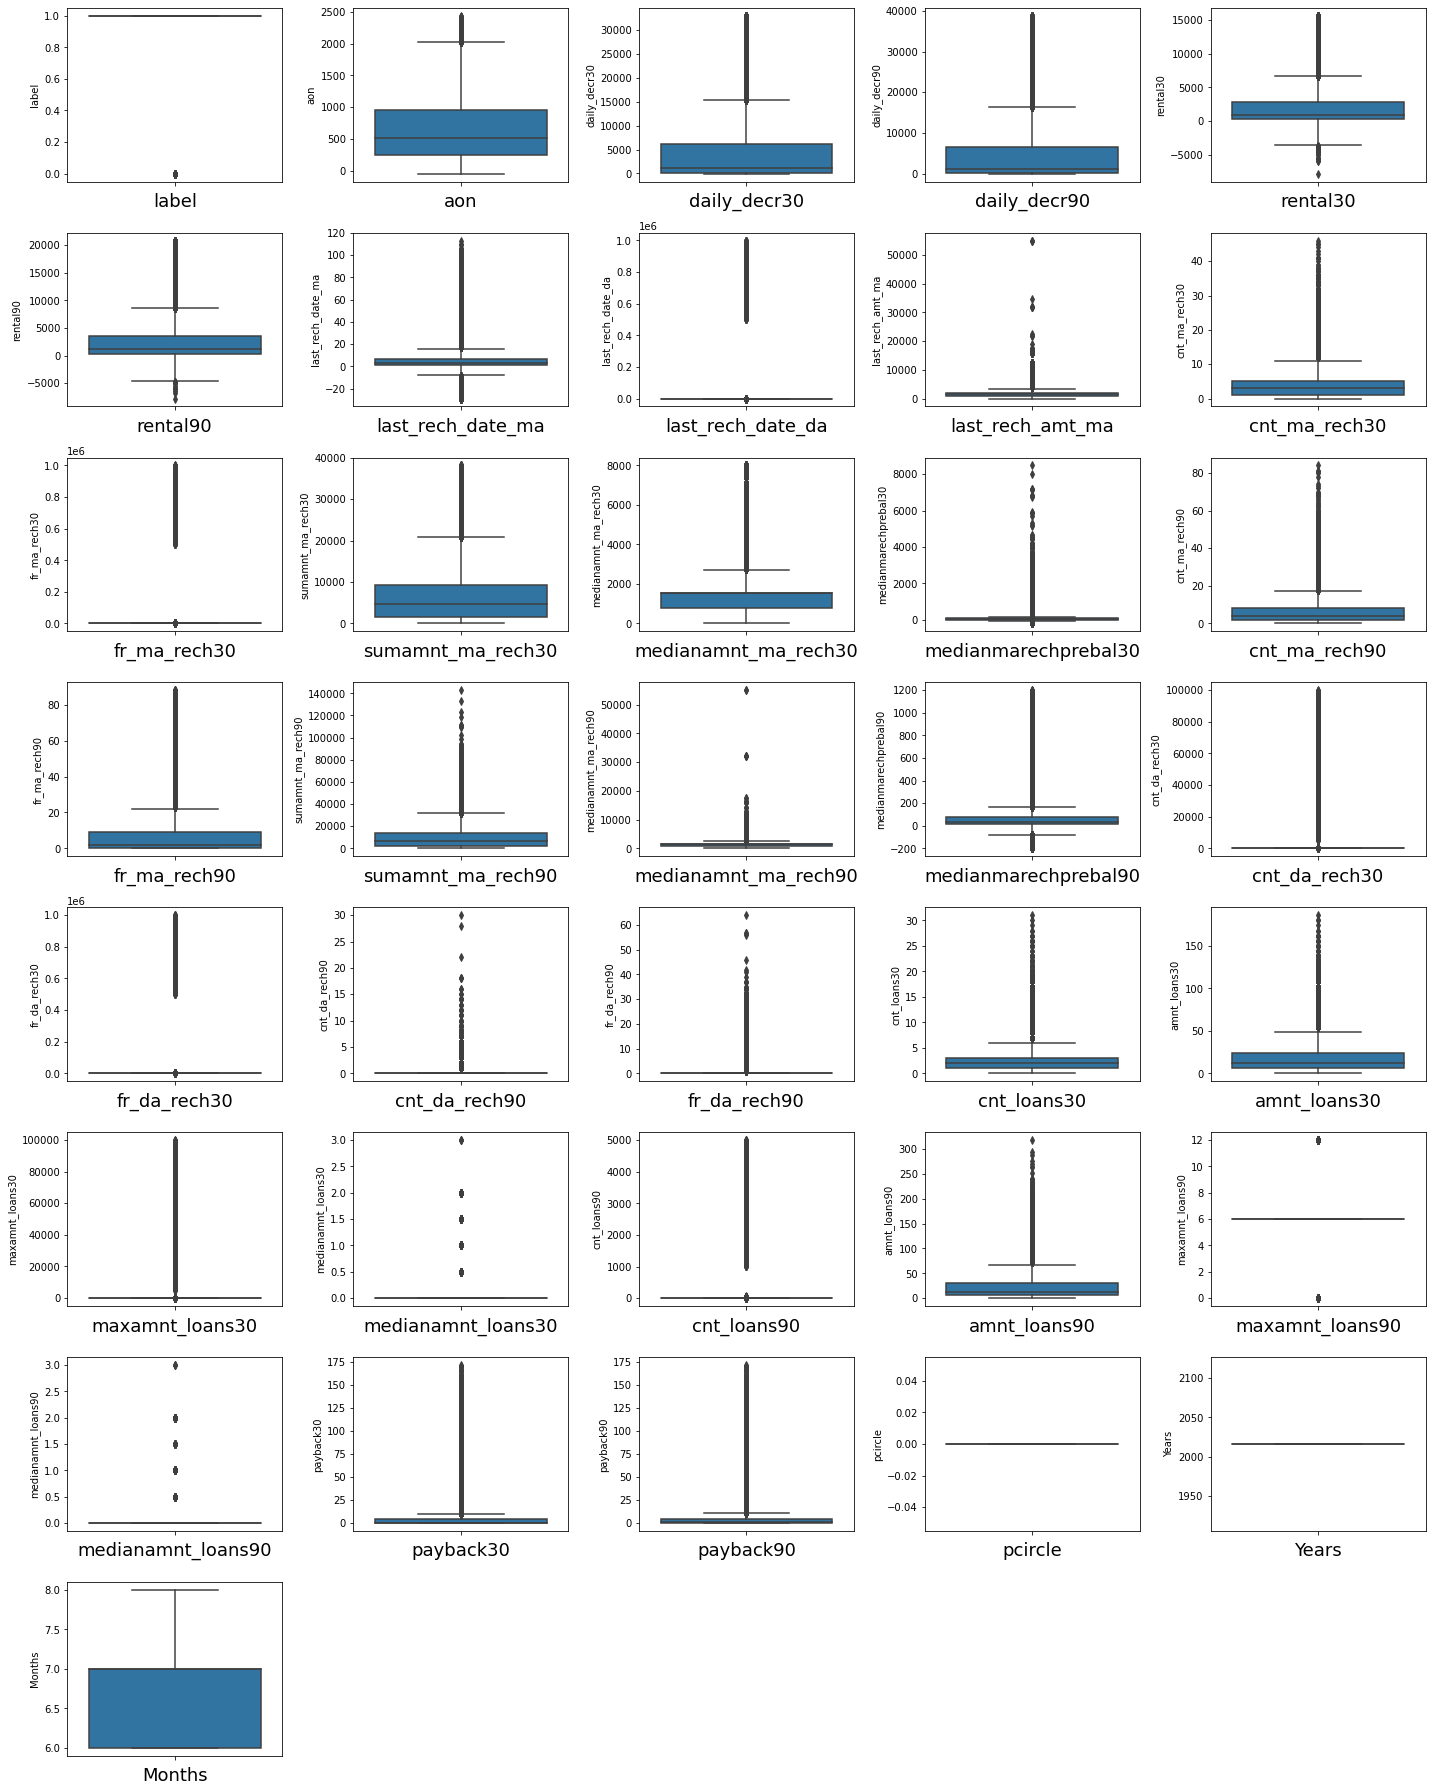

In [49]:
# Let' see outliers are removed in columns or not.
print('===========')
print('Box Plot :-')
print('===========')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=40:
        ax = plt.subplot(8,5, plotnumber)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### Outliers are removed

In [13]:
print('Shape of remaining data after removal of outliers ----->', df.shape )

Shape of remaining data after removal of outliers -----> (191102, 36)


### Spliting Dataset into features and label

In [12]:
x = df.drop('label', axis = 1)
y = df. label
print('Data has been splited')

Data has been splited


-----------------
Scatter Plot :-
-----------------


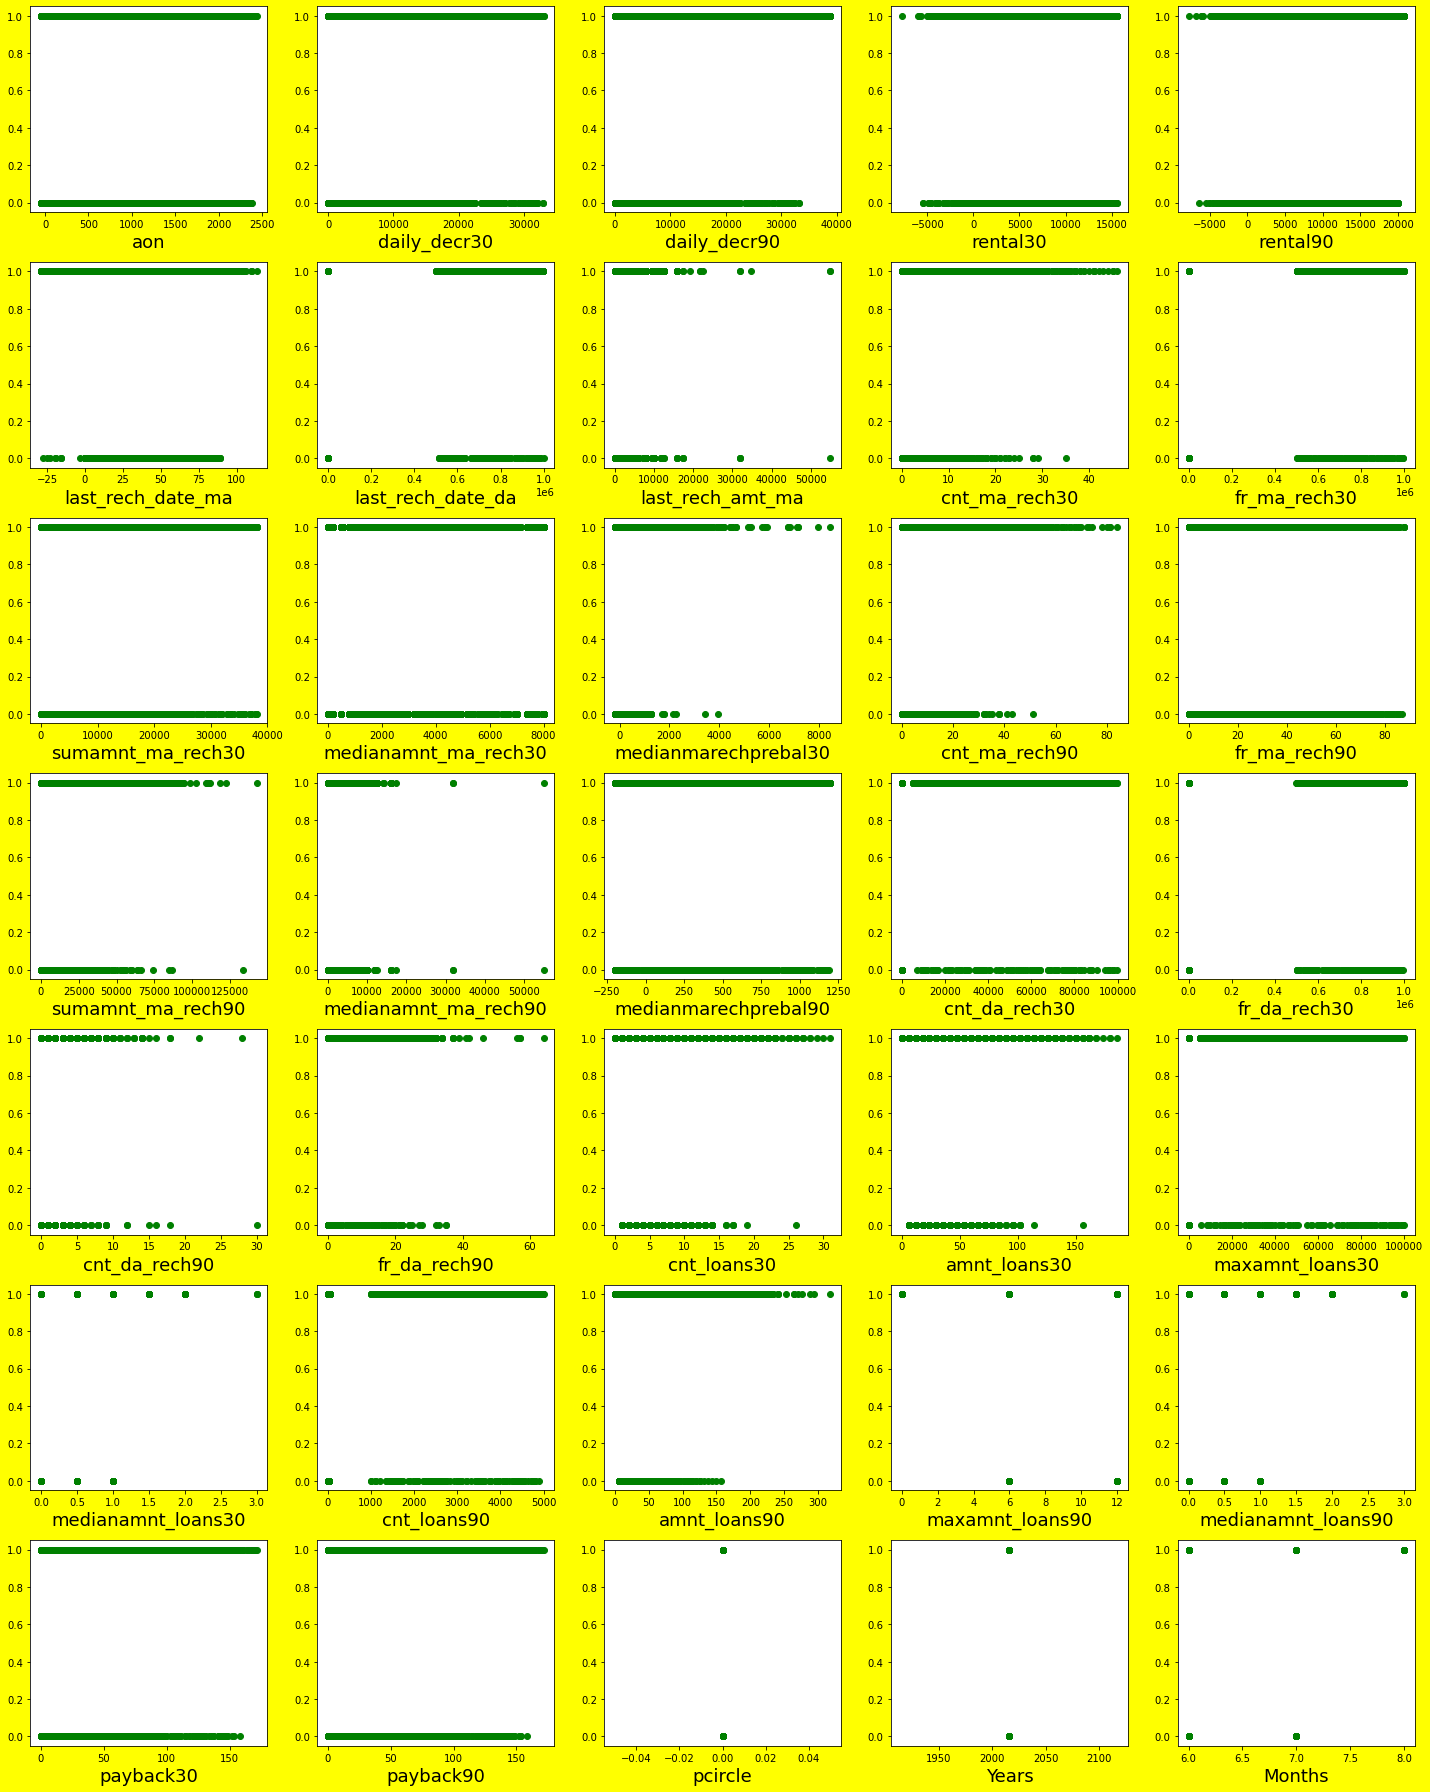

In [64]:
# Let' see relation between features and label.
print('-----------------')
print('Scatter Plot :-')
print('-----------------')

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1
for column in x:
    if plotnumber <=35:
        ax = plt.subplot(7,5, plotnumber)
        plt.scatter(x[column],y, c = 'g')
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### Positive relation in feature and label

### Checking Multicollinearity we use VIF

In [68]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,Features,Vif
0,aon,1.022442
1,daily_decr30,29.835354
2,daily_decr90,34.081064
3,rental30,12.181941
4,rental90,13.422603
5,last_rech_date_ma,1.358305
6,last_rech_date_da,1.000131
7,last_rech_amt_ma,3.370721
8,cnt_ma_rech30,16.368299
9,fr_ma_rech30,1.000142


#### Obsevation : Multicollinearity present our dataset. If we remove it we lost some important data and we did not build good model to order to avoid this problem we deside to go with multicollinearity.

### Power Transformer to remove skewness

In [13]:
scaler = PowerTransformer(method = 'yeo-johnson')
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.7186133 ,  0.50098104,  0.47217442, ...,  0.        ,
         0.        ,  0.4743238 ],
       [ 0.25818462,  1.25721445,  1.19867831, ...,  0.        ,
         0.        ,  1.52188453],
       [-0.10071769,  0.15226181,  0.13303431, ...,  0.        ,
         0.        ,  1.52188453],
       ...,
       [ 0.80804739,  1.24273183,  1.18772341, ...,  0.        ,
         0.        ,  0.4743238 ],
       [ 1.94116177,  1.27582809,  1.22053219, ...,  0.        ,
         0.        ,  0.4743238 ],
       [ 1.71835354,  0.69267423,  0.66068687, ...,  0.        ,
         0.        ,  0.4743238 ]])

In [16]:
print('=======================================')
print(x.skew())
print('=======================================')

aon                      0.956231
daily_decr30             1.895911
daily_decr90             2.006800
rental30                 2.087459
rental90                 2.123151
last_rech_date_ma        3.106852
last_rech_date_da       14.919345
last_rech_amt_ma         2.675976
cnt_ma_rech30            2.040000
fr_ma_rech30            14.819144
sumamnt_ma_rech30        1.628899
medianamnt_ma_rech30     2.310441
medianmarechprebal30    10.832164
cnt_ma_rech90            2.202037
fr_ma_rech90             2.248870
sumamnt_ma_rech90        1.908137
medianamnt_ma_rech90     2.863454
medianmarechprebal90     3.674106
cnt_da_rech30           17.664061
fr_da_rech30            14.704617
cnt_da_rech90           23.824260
fr_da_rech90            29.959850
cnt_loans30              2.339384
amnt_loans30             2.318080
maxamnt_loans30         17.694898
medianamnt_loans30       4.556526
cnt_loans90             16.544016
amnt_loans90             2.546375
maxamnt_loans90          1.882088
medianamnt_loa

---------------------
Distribution Plot :- 
---------------------


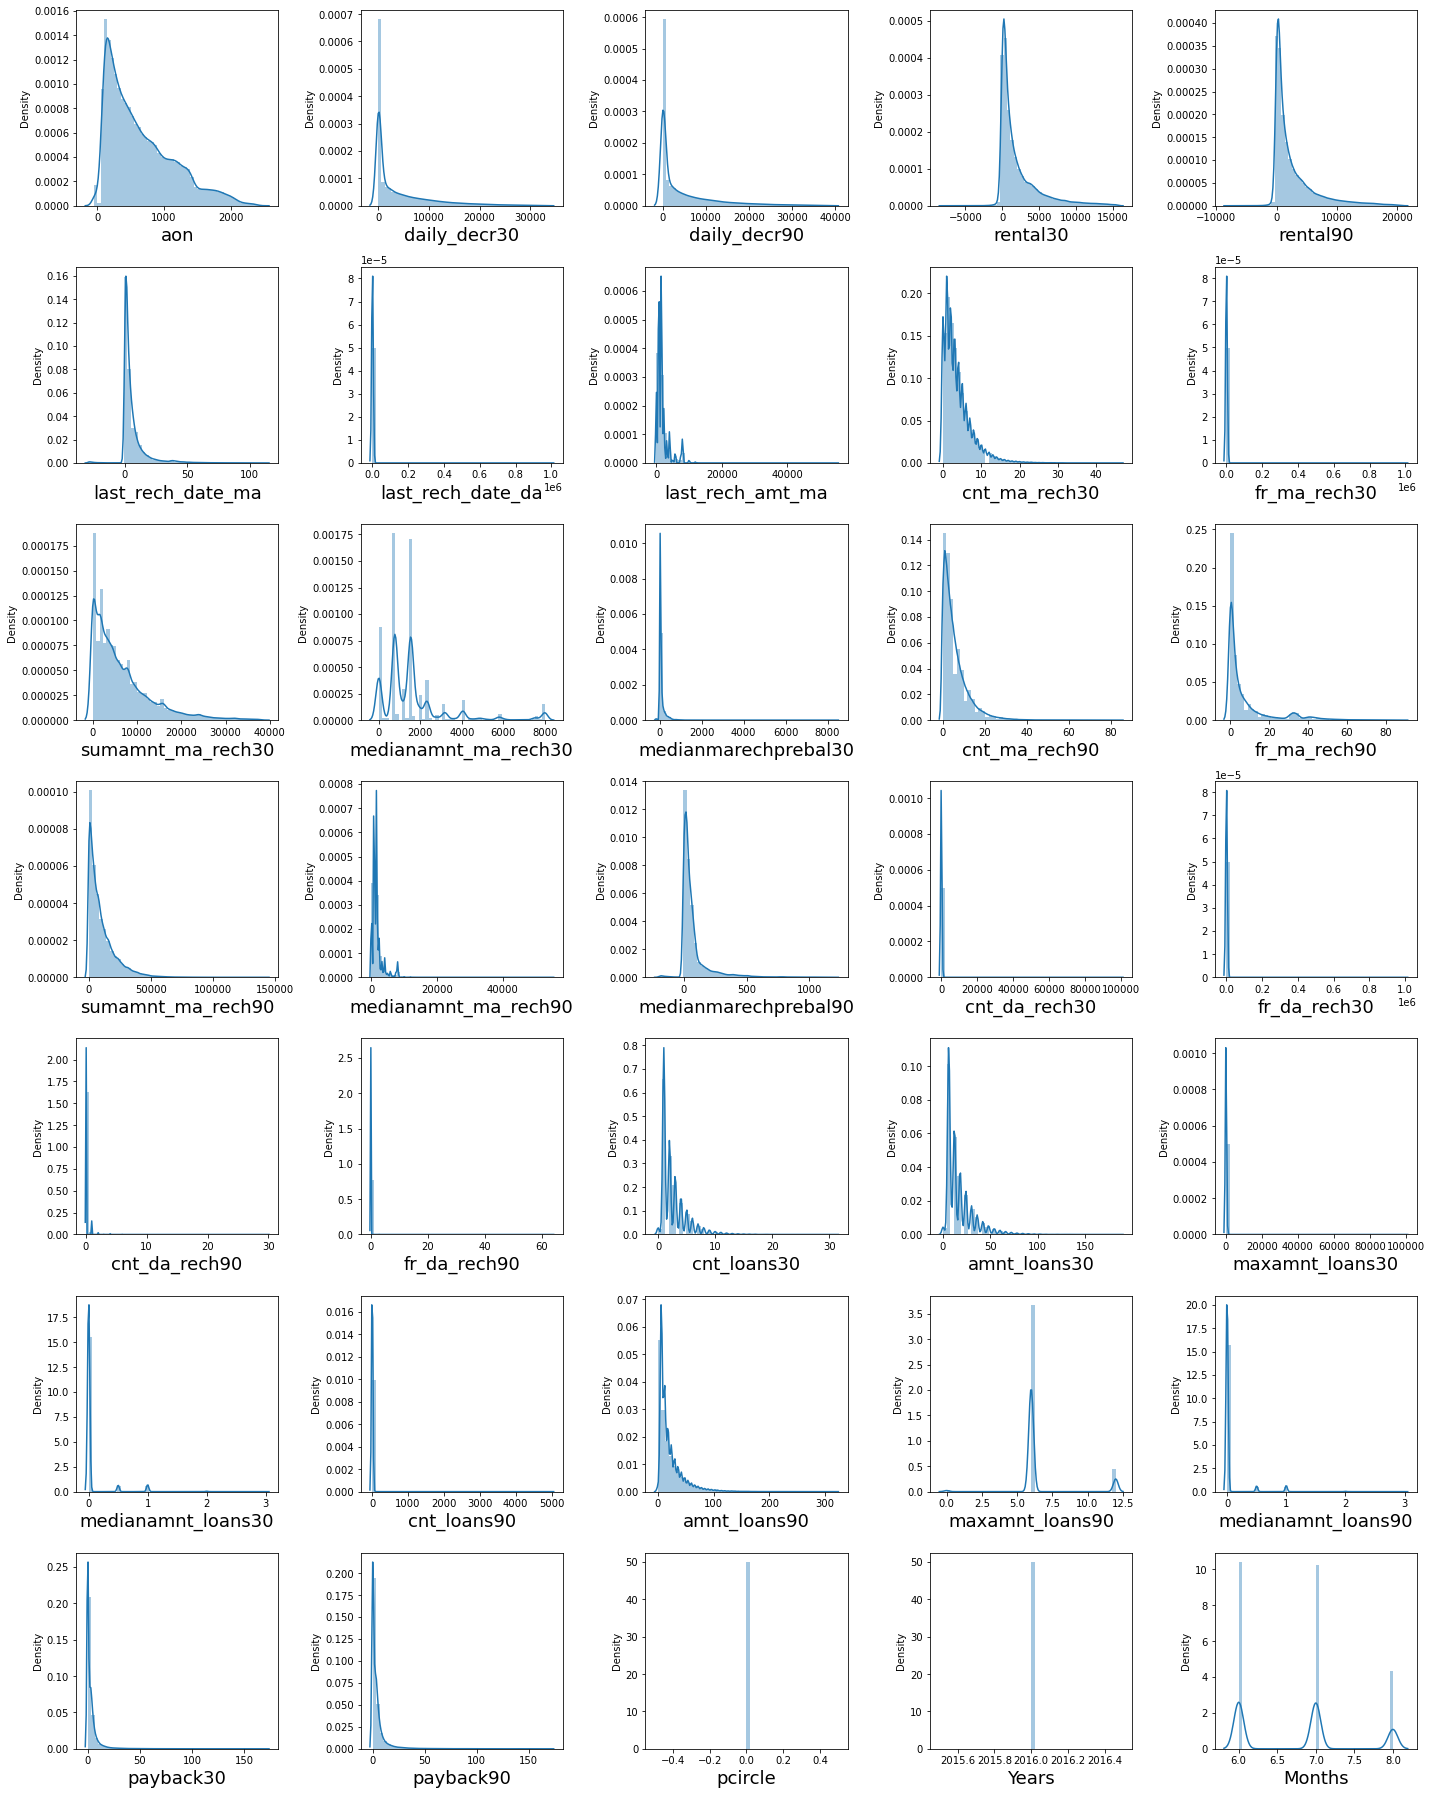

In [81]:
# Let' check skewness are removed in columns or not.
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=35:
        ax = plt.subplot(7,5, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### Skewness are removed

### Checking for class imbalance

In [14]:
df['label'].value_counts()

1    166132
0     24970
Name: label, dtype: int64

#### Class are not balance

### Handling Class Imbalance

In [15]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [16]:
print('---------------------')
print('Class are balanced :-')
print('---------------------')
print(y_over.value_counts())
print('---------------------')

---------------------
Class are balanced :-
---------------------
0    166132
1    166132
Name: label, dtype: int64
---------------------


### Data Scaling

In [17]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.12861736, 0.09375551, 0.08002726, ..., 0.        , 0.        ,
        0.5       ],
       [0.30546624, 0.3678619 , 0.31304876, ..., 0.        , 0.        ,
        1.        ],
       [0.23432476, 0.04366061, 0.03714658, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42644695, 0.35943072, 0.30737987, ..., 0.        , 0.        ,
        0.5       ],
       [0.71543408, 0.37893349, 0.32461342, ..., 0.        , 0.        ,
        0.5       ],
       [0.65474277, 0.13711674, 0.11782857, ..., 0.        , 0.        ,
        0.5       ]])

### Data has been scaled

### Split data into train and test. Model will be bulit on training data and tested on test data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [41]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 10, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [42]:
bag_dt.oob_score

True

In [43]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

Bagging DT score -------> 0.9222305154937038


In [44]:
y_pred = bag_dt.predict(x_test)

In [45]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     41662
           1       0.93      0.91      0.92     41404

    accuracy                           0.92     83066
   macro avg       0.92      0.92      0.92     83066
weighted avg       0.92      0.92      0.92     83066

------------------------------------------------------------



#### Conclusion : Decision Tree model has 92% score

### Cross Validation score to check if the model is overfitting

In [35]:
cv = cross_val_score(bag_dt, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.9050664094060581


#### Conclusion : Decision Tree model has 90% Cross Validation score

### ROC, AUC Curve

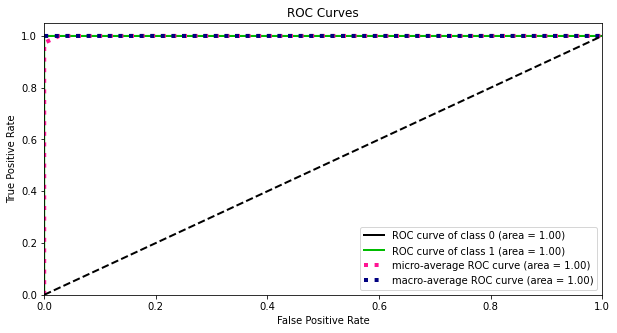

In [98]:
prob = bag_dt.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### XGBoost model instantiaing, training and evaluating

In [47]:
bag_xgb = BaggingClassifier(xgb.XGBClassifier(eval_metric = 'mlogloss'), n_estimators = 10, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [48]:
bag_xgb.oob_score

True

In [49]:
bag_xgb.fit(x_train, y_train)
print('Bagging XGBoost score ------->', bag_xgb.score(x_test, y_test))

Bagging XGBoost score -------> 0.934437676064816


In [50]:
y_pred = bag_xgb.predict(x_test)

In [51]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     41662
           1       0.93      0.94      0.93     41404

    accuracy                           0.93     83066
   macro avg       0.93      0.93      0.93     83066
weighted avg       0.93      0.93      0.93     83066

------------------------------------------------------------



#### Conclusion : XGBoost model has 93% score

### Cross Validation score to check if the model is overfitting

In [27]:
cv = cross_val_score(bag_xgb, x, y, cv = 5)
print('Cross Validation score of XGBoost model --->', cv.mean())

Cross Validation score of XGBoost model ---> 0.914877927511035


#### Conclusion : XGBoost model has 91% Cross Validation score

### ROC, AUC Curve

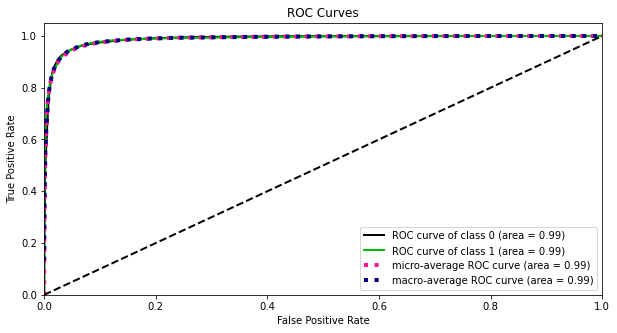

In [36]:
prob = bag_xgb.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Random Forest model instantiaing, training and evaluating

In [19]:
bag_Rn = BaggingClassifier(RandomForestClassifier(), n_estimators = 10, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [20]:
bag_Rn.oob_score

True

In [22]:
bag_Rn.fit(x_train, y_train)
print('Bagging Random Forest score ------->', bag_Rn.score(x_test, y_test))

Bagging Random Forest score -------> 0.9278525509835552


In [23]:
y_pred = bag_Rn.predict(x_test)

In [30]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     41662
           1       0.92      0.94      0.93     41404

    accuracy                           0.93     83066
   macro avg       0.93      0.93      0.93     83066
weighted avg       0.93      0.93      0.93     83066

------------------------------------------------------------



#### Conclusion : Random Forest model has 93% score

### Cross Validation score to check if the model is overfitting

In [31]:
cv = cross_val_score(bag_Rn, x, y, cv = 5)
print('Cross Validation score of Rn model --->', cv.mean())

Cross Validation score of Rn model ---> 0.9133708760164299


#### Conclusion : Random Forest model has 91% Cross Validation score

### ROC, AUC Curve

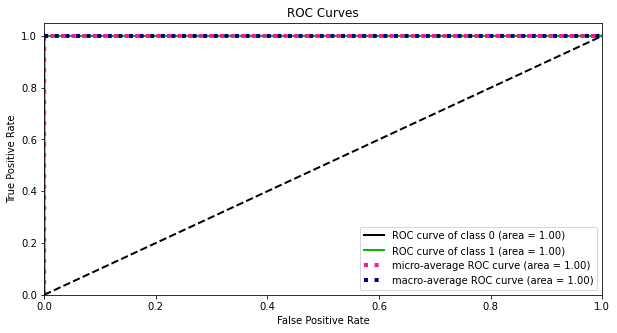

In [32]:
prob = bag_Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Logistic Regression model instantiaing, training and evaluating

In [33]:
bag_Lr = BaggingClassifier(LogisticRegression(), n_estimators = 10, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [34]:
bag_Lr.oob_score

True

In [35]:
bag_Lr.fit(x_train, y_train)
print('Bagging Logostic Regression score ------->', bag_Lr.score(x_test, y_test))

Bagging Logostic Regression score -------> 0.7420605301808201


In [36]:
y_pred = bag_Lr.predict(x_test)

In [37]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     41662
           1       0.80      0.64      0.71     41404

    accuracy                           0.74     83066
   macro avg       0.75      0.74      0.74     83066
weighted avg       0.75      0.74      0.74     83066

------------------------------------------------------------



#### Conclusion : Logistic Regression model has 74% score

### Cross Validation score to check if the model is overfitting

In [38]:
cv = cross_val_score(bag_Lr, x, y, cv = 5)
print('Cross Validation score of Logistic regression model --->', cv.mean())

Cross Validation score of Logistic regression model ---> 0.8697868191479035


#### Conclusion : Logistic Regression model has 86% Cross Validation score

### ROC, AUC Curve

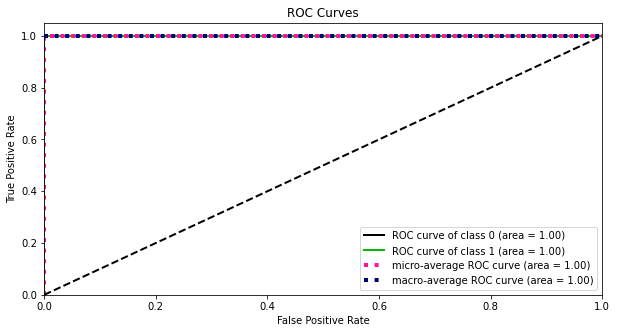

In [39]:
prob = bag_Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Let's find ROC, AUC score

In [46]:
# DecisionTreeClassifier
roc_auc_score(y_test, bag_dt.predict(x_test))

0.9222007491445168

In [52]:
# XGBoostClassifier
roc_auc_score(y_test, bag_xgb.predict(x_test))

0.9344681536222694

In [53]:
# RandomForestClassifier
roc_auc_score(y_test, bag_Rn.predict(x_test))

0.9286151591824386

In [54]:
# LogisticRegressionClassifier
roc_auc_score(y_test, bag_Lr.predict(x_test))

0.7417353498881218

### Let's check ROC, AUC Curve for the fitted model

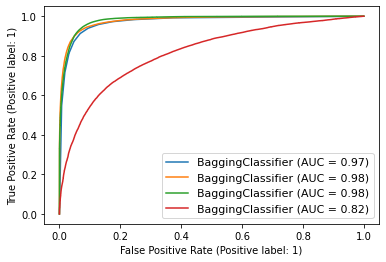

In [55]:
dis = plot_roc_curve(bag_dt, x_test, y_test)
plot_roc_curve(bag_Rn, x_test, y_test, ax = dis.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(bag_xgb, x_test, y_test, ax = dis.ax_)
plot_roc_curve(bag_Lr, x_test, y_test, ax = dis.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

### Looking ROC, AUC Curve we found Random Forest has best model so we do Hyperparameter Tuning on it.

In [24]:
param = {'n_estimators': [5,10], 'max_samples': [1.0], 'bootstrap': [True]}

In [25]:
grid_search = GridSearchCV(estimator = bag_Rn, param_grid = param, cv = 3 , n_jobs = -1)

In [26]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         max_samples=0.5, oob_score=True,
                                         random_state=3),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_samples': [1.0],
                         'n_estimators': [5, 10]})

In [27]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 10}


In [28]:
hRn = BaggingClassifier(base_estimator=RandomForestClassifier(),max_samples = 1.0, bootstrap = True , n_estimators = 10)
hRn.fit(x_train, y_train)
hRn.score(x_test, y_test)

0.9338237064502926

In [29]:
y_pred = hRn.predict(x_test)

In [30]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     41662
           1       0.93      0.94      0.93     41404

    accuracy                           0.93     83066
   macro avg       0.93      0.93      0.93     83066
weighted avg       0.93      0.93      0.93     83066

------------------------------------------------------------



#### After Hyperparameter Tuning model accuracy score 93%.

### Saving The Model

In [34]:
# saving the model to the Local file system
try: 
    filename = 'Micro Credit Project.pickle'
    pickle.dump(hRn, open(filename, 'wb'))
except MemoryError:
    pass

## Final Conclusion: Random Forest is best model.